## Data Cleaning

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('../data/clean_data.csv')
df.shape

(80, 8)

In [61]:
df.isna().sum()

Decision          1
State             0
GPA               1
WorkExp           0
TestScore         1
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [62]:
df = df[df['Decision'].notna()]
df.head(10)

,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
2,Banana,California,3.80,2.3,970.0,98,0.0,5
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
4,Admit,Colorado,3.92,1.2,969.0,95,-1.0,3
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2
8,Admit,Florida,3.90,4.7,961.0,93,1.0,1
9,Admit,California,3.70,1.4,966.0,94,1.0,0
10,Admit,Florida,3.80,1.7,968.0,91,NaN,3


In [63]:
df.isna().sum()

Decision          0
State             0
GPA               1
WorkExp           0
TestScore         0
WritingScore      0
Gender            2
VolunteerLevel    0
dtype: int64

In [64]:
df = df.dropna()

In [66]:
# remove nonsensical answers in Decision and Gender columns
df['Decision'].unique()
df = df[df['Decision'] != 'Banana']
print(df.shape)
df = df.drop(df[df["Gender"] < 0].index)
df = df.drop(df[df["WorkExp"] > 50].index)
df = df.drop(df[df["GPA"] > 5].index)
df.head()

(83, 8)


,Decision,State,GPA,WorkExp,TestScore,WritingScore,Gender,VolunteerLevel
0,Admit,California,3.90,6.7,962.0,100,1.0,0
1,Admit,Florida,3.80,1.4,969.0,97,1.0,4
3,Admit,Colorado,3.60,0.9,969.0,97,0.0,2
6,Admit,California,3.88,1.5,967.0,95,1.0,5
7,Admit,California,3.70,1.2,969.0,94,1.0,2


In [67]:
# capitalize all states
df.State = df.State.str.title()
df['State'] = df['State'].replace('New york', 'New York')

In [68]:
# Save to csv
df.to_csv("../data/clean_data.csv", index=False)

## Visualizations

In [30]:
# Hide output with -q
!pip install -q altair

In [61]:
decision_count = df.groupby(['Decision', 'State']).size().reset_index()
decision_count = decision_count.rename(columns={0: 'Count'})
decision_count

,Decision,State,Count
0,Admit,California,9
1,Admit,Colorado,8
2,Admit,Florida,11
3,Admit,Utah,1
4,Decline,California,1
5,Decline,Colorado,6
6,Decline,Florida,13
7,Decline,Mississippi,1
8,Decline,Oregon,1
9,Decline,Utah,2


In [62]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).transform_filter(
    selection
).mark_bar().encode(
    alt.X('Decision:O', title='Decision'),
    alt.Y('Count:Q', title='Count'),
).add_selection(selection).interactive()
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.Chart(...)

In [201]:
import altair as alt

unique_states = decision_count['State'].unique().tolist()

# # Dropdown selection
# input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
# selection = alt.selection_single(fields=['State'], bind=input_dropdown)

decision_bar = alt.Chart(decision_count).mark_bar().encode(
    x=alt.X('Decision:O', title='Decision', axis=alt.Axis(labelAngle=0), sort='-y'),
    y=alt.Y('Count:Q', title='Count'),
    xOffset='State',
    color=alt.Color('State:N', sort=alt.EncodingSortField(field='Count', op='sum', order='descending'), scale=alt.Scale(range=custom_palette))
)
chart_title = "Bar Chart of Decision Results Counts for States"
decision_bar = decision_bar.properties(title=chart_title)

decision_bar

alt.Chart(...)

array([[<Axes: title={'center': 'Admit'}>,
        <Axes: title={'center': 'Decline'}>],
       [<Axes: title={'center': 'Waitlist'}>, <Axes: >]], dtype=object)

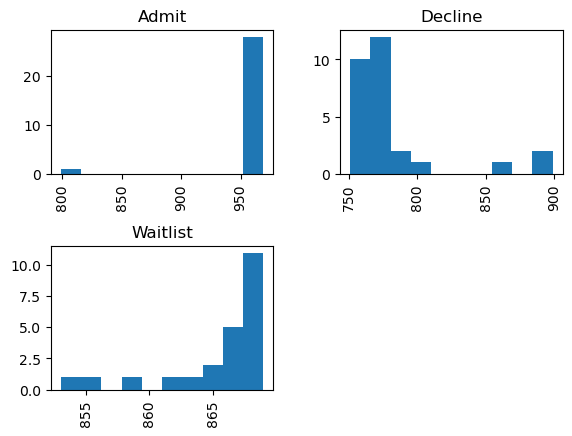

In [64]:
df.hist('TestScore', by='Decision')

[Text(0.5, 1.0, 'Histogram of Test Scores by Decision')]

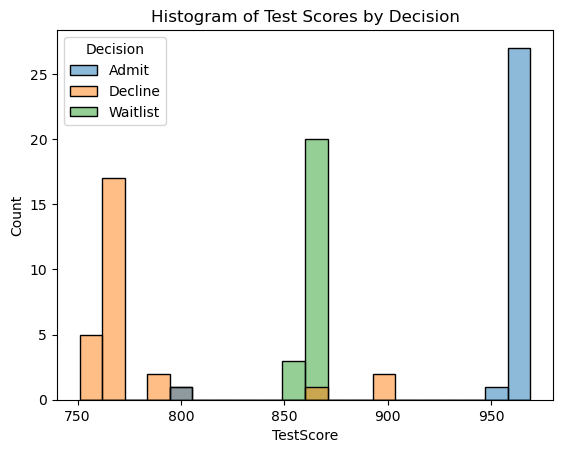

In [65]:
sns.histplot(x="TestScore", hue="Decision", data=df, bins=20).set(title='Histogram of Test Scores by Decision')

In [66]:
# Dropdown selection
input_dropdown = alt.binding_select(options=[None] + unique_states, labels = ['All'] + unique_states, name='State')
selection = alt.selection_single(fields=['State'], bind=input_dropdown)

gpa_bar = alt.Chart(df).transform_filter(
    selection
).mark_bar(
    opacity=0.5,
    binSpacing=0
).encode(
    alt.X('GPA:Q'),
    alt.Y('count()', title='Count of Occurrences'),
    alt.Color('Decision:N')
).add_selection(selection).interactive()
chart_title = "Histogram of GPA by Decision Result for States"
gpa_bar = gpa_bar.properties(title=chart_title)

gpa_bar

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'selection_single' is deprecated.  Use 'selection_point'

c:\Users\theda\anaconda3\Lib\site-packages\altair\utils\deprecation.py:65: AltairDeprecationWarning:

'add_selection' is deprecated. Use 'add_params' instead.



alt.Chart(...)

In [141]:
custom_palette = ['#00072D', '#0A2472', '#0E6BA8', '#A6E1FA', '#99ABC5', '#8B748F', '#6F0624']

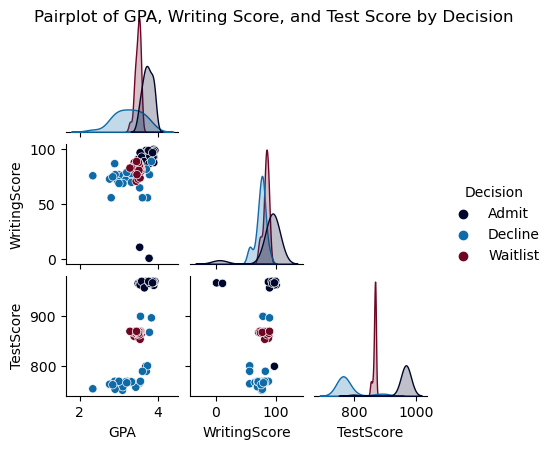

In [225]:
scatter_cols = df[['State', 'Decision', 'GPA', 'WritingScore', 'TestScore']]
tri_color = [custom_palette[0], custom_palette[2], custom_palette[6]]
g = sns.pairplot(scatter_cols, hue='Decision', palette=tri_color, corner=True, height=1.5)
g.fig.suptitle('Pairplot of GPA, Writing Score, and Test Score by Decision')
plt.savefig("../website/images/decision_pairplot.png")

## Maps

In [68]:
#calculate averages of all numeric columns
num_cols = df[['State', 'GPA', 'WorkExp', 'TestScore', 'WritingScore', 'VolunteerLevel']]
avg_df = num_cols.groupby('State').mean().reset_index()
state_abbr = {
    'Alabama': 'AL',
    'California': 'CA',
    'Colorado': 'CO',
    'Florida': 'FL',
    'Georgia': 'GA',
    'Mississippi': 'MS',
    'New York': 'NY',
    'Oregon': 'OR',
    'Utah': 'UT',
    'Vermont': 'VT',
    'Virginia': 'VA'

}
avg_df['State_Abbr'] = avg_df['State'].map(state_abbr)
avg_df = avg_df.drop(columns=['State'])
avg_df = avg_df.rename(columns={'State_Abbr': 'State'})
avg_df

,GPA,WorkExp,TestScore,WritingScore,VolunteerLevel,State
0,3.410000,1.200000,868.000000,85.000000,0.000000,AL
1,3.600833,2.808333,916.166667,90.833333,2.666667,CA
2,3.467222,1.844444,877.055556,80.000000,2.444444,CO
3,3.559143,2.117143,872.571429,80.428571,2.457143,FL
4,2.910000,6.200000,753.000000,77.000000,1.000000,MS
5,3.550000,2.200000,866.000000,74.000000,1.000000,NY
6,2.900000,0.900000,769.000000,87.000000,4.000000,OR
7,3.443333,1.250000,850.666667,78.333333,2.500000,UT
8,3.530000,3.300000,862.000000,85.000000,1.000000,VT
9,3.142500,2.375000,766.000000,76.500000,3.250000,VA


In [145]:
import plotly.express as px

fig = px.choropleth(avg_df, locationmode="USA-states", 
                    locations=avg_df['State'], 
                    scope="usa",
                    color=avg_df['GPA'],
                    hover_data={"State": True, "GPA": True},  
                    labels={"GPA": "Selected Variable"},
                    color_continuous_scale=custom_palette
                )

dropdown = []
for col in avg_df.columns[:-1]:
    dropdown.append({'label': col, 'method': 'update', 'args': [{'z': [avg_df[col]]}]})

fig.update_layout(updatemenus=[{'buttons': dropdown, 'direction': 'down', 'showactive': True}],
                  title='Choropleth Map of Average Selected Variable')
fig.update_coloraxes(colorbar_title=dict(text='Selected Variable'))

fig.show()

In [180]:
from vega_datasets import data 
decision_state = df.groupby(['Decision', 'State'])[["GPA"]].count().reset_index()
decision_state = decision_state.rename(columns={'GPA':'StateCount'})
decision_state['DecisionCount'] = decision_state.groupby('Decision')['StateCount'].transform('sum')
decision_state['Rate'] = decision_state['StateCount'] / decision_state['DecisionCount'] * 100

state_id_dict = dict(zip(data.population_engineers_hurricanes()["state"], data.population_engineers_hurricanes()["id"]))
decision_state["StateID"] = decision_state["State"].map(state_id_dict)

decision_state

,Decision,State,StateCount,DecisionCount,Rate,StateID
0,Admit,California,9,29,31.034483,6
1,Admit,Colorado,8,29,27.586207,8
2,Admit,Florida,11,29,37.931034,12
3,Admit,Utah,1,29,3.448276,49
4,Decline,California,1,28,3.571429,6
5,Decline,Colorado,6,28,21.428571,8
6,Decline,Florida,13,28,46.428571,12
7,Decline,Mississippi,1,28,3.571429,28
8,Decline,Oregon,1,28,3.571429,41
9,Decline,Utah,2,28,7.142857,49


In [184]:
admit_states = decision_state[decision_state['Decision'] == "Admit"]
decline_states = decision_state[decision_state['Decision'] == "Decline"]

In [216]:
states = alt.topo_feature('https://raw.githubusercontent.com/vega/vega-datasets/master/data/us-10m.json', 'states')
click = alt.selection_multi(fields = ["State"])

admit_map = (
    alt.Chart(states)
    .mark_geoshape(stroke='black')
    .encode(
        color=alt.Color("Rate:Q", scale=alt.Scale(range=custom_palette)),
        opacity=alt.condition('isValid(datum.Rate)', alt.value(1), alt.value(0.2))
    )
    .transform_lookup(
        lookup="id",
        from_=alt.LookupData(admit_states, "StateID", list(admit_states.columns))
    )
    .properties(width=500, height=300, title="Admission Rates by State")
    .add_selection(click)
    .project(type="albersUsa")
    .encode(tooltip=["properties.name:N", "Rate:Q"])
    .interactive()
)

# Display the admit_map visualization
admit_map

alt.Chart(...)

In [223]:
states = alt.topo_feature('https://raw.githubusercontent.com/vega/vega-datasets/master/data/us-10m.json', 'states')
click = alt.selection_multi(fields = ["State"])

existing_states = alt.Chart(states).mark_geoshape(stroke='black').encode(
    color = alt.Color("Rate:Q", scale=alt.Scale(range=custom_palette)),
    tooltip = ["State:N", "Rate:Q"],
    opacity = alt.condition('isValid(datum.Rate)', alt.value(1), alt.value(0.2)),
).transform_lookup(
    lookup = "id",
    from_ = alt.LookupData(admit_states, "StateID", list(admit_states.columns))
).properties(width = 333, height = 200, title="Admission Rates by State").add_selection(click).project(type = "albersUsa").interactive()

missing_states = (
    alt.Chart(states)
    .mark_geoshape(fill = "grey", stroke = "white")
    .encode(opacity=alt.condition("isValid(datum.Rate)", alt.value(0), alt.value(0.2))).add_selection(click).project(type = "albersUsa")
    )

admit_map = existing_states + missing_states
admit_map = admit_map.encode(
    tooltip= ["State:N", "Rate:Q"]
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(admit_states, "StateID", list(admit_states.columns))
    ).interactive()

existing_states = alt.Chart(states).mark_geoshape(stroke='black').encode(
    color = alt.Color("Rate:Q", scale=alt.Scale(range=custom_palette)),
    tooltip = ["State:N", "Rate:Q"],
    opacity = alt.condition('isValid(datum.Rate)', alt.value(1), alt.value(0.2)),
).transform_lookup(
    lookup = "id",
    from_ = alt.LookupData(decline_states, "StateID", list(decline_states.columns))
).properties(width = 333, height = 200, title="Rejection Rates by State").add_selection(click).project(type = "albersUsa").interactive()

missing_states = (
    alt.Chart(states)
    .mark_geoshape(fill = "grey", stroke = "white")
    .encode(opacity=alt.condition("isValid(datum.Rate)", alt.value(0), alt.value(0.2))).add_selection(click).project(type = "albersUsa")
    )

decline_map = existing_states + missing_states
decline_map = decline_map.encode(
    tooltip= ["State:N", "Rate:Q"]
    ).transform_lookup(
        lookup="id",
        from_=alt.LookupData(decline_states, "StateID", list(decline_states.columns))
    ).interactive()

admit_map | decline_map

alt.HConcatChart(...)